## Employee Satisfaction Analytics: Insights to Foster a Positive Workplace Environment

### **Business Problem Understanding:**
A mid-sized IT company has conducted an Employee Satisfaction Survey to understand key drivers of employee engagement, job satisfaction, and overall workplace happiness. The HR department is particularly concerned about increasing attrition and low morale in certain departments.

The goal is to:

* Analyze the survey data to identify satisfaction and dissatisfaction trends.
* Detect patterns and correlations between various factors and employee satisfaction.
* Provide actionable insights to improve employee retention and the overall workplace environment.

### **Student Task Objectives:**

Students are expected to:

1. Perform descriptive analysis of survey responses.
2. Identify key factors and patterns affecting employee satisfaction.
3. Suggest HR interventions based on insights.
4. Visualize findings using appropriate charts/graphs.

In [2]:
# Importing All libraries 
# Begin by importing necessary libraries such as pandas for data manipulation, numpy for numerical operations, 
#and matplotlib or seaborn for visualization.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Data Understanding

In [2]:
# Load the Dataset: Read the data into a pandas DataFrame

df = pd.read_csv("employee_survey.csv")
df

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


### Analyzing the Data / Data Exploration

In [3]:
# to check the shape of the dataset
# This function is used to understand the number of rows and columns in the dataset
# This gives an overview of the dataset’s size and structure

df.shape

(3025, 23)

In [4]:
# This function helps us to understand the dataset by showing the number of records in each column, type of data,
# whether any values are missing and how much memory the dataset uses.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

In [5]:
# tocheck the datatpes of the column
df.dtypes

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
dtype: object

In [6]:
# This method gives a statistical summary of the DataFrame showing values like count, mean, standard deviation,
# minimum and quartiles for each numerical column.
# It helps in summarizing the central tendency and spread of the data.

df.describe()

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [7]:
# This converts the column names of the DataFrame into a Python list making it easy to access and manipulate the column names.
df.columns.tolist()

['EmpID',
 'Gender',
 'Age',
 'MaritalStatus',
 'JobLevel',
 'Experience',
 'Dept',
 'EmpType',
 'WLB',
 'WorkEnv',
 'PhysicalActivityHours',
 'Workload',
 'Stress',
 'SleepHours',
 'CommuteMode',
 'CommuteDistance',
 'NumCompanies',
 'TeamSize',
 'NumReports',
 'EduLevel',
 'haveOT',
 'TrainingHoursPerYear',
 'JobSatisfaction']

### Checking Missing Values

In [8]:
# This checks for missing values in each column and returns the total number of null values per column helping us to identify any gaps in our data
df.isnull().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

#### Checking for the duplicate values

In [9]:
# This function tells us how many unique values exist in each column which provides insight into the variety of data in each feature.
df.nunique()

EmpID                    3025
Gender                      3
Age                        39
MaritalStatus               4
JobLevel                    5
Experience                 30
Dept                        8
EmpType                     3
WLB                         5
WorkEnv                     5
PhysicalActivityHours      51
Workload                    5
Stress                      5
SleepHours                 60
CommuteMode                 5
CommuteDistance            29
NumCompanies               13
TeamSize                   26
NumReports                 10
EduLevel                    4
haveOT                      2
TrainingHoursPerYear       79
JobSatisfaction             5
dtype: int64

In [10]:
# In this code we caunt overall value of the dataframe but when we count value of the dataframe the dataframe ,
# look like messy ,we can't understand properly thats why in next line we count value of the dataframe  per column.
df.value_counts()

EmpID  Gender  Age  MaritalStatus  JobLevel  Experience  Dept        EmpType    WLB  WorkEnv  PhysicalActivityHours  Workload  Stress  SleepHours  CommuteMode       CommuteDistance  NumCompanies  TeamSize  NumReports  EduLevel     haveOT  TrainingHoursPerYear  JobSatisfaction
1      Female  37   Married        Senior    5           Operations  Full-Time  5    3        2.1                    3         1       8.2         Motorbike         18               5             24        7           Bachelor     False   42.5                  5                  1
2022   Male    31   Married        Senior    9           Finance     Full-Time  5    5        1.2                    3         1       6.4         Car               8                3             23        2           Bachelor     False   44.5                  5                  1
2013   Female  29   Single         Junior    7           Marketing   Full-Time  4    5        1.7                    4         1       7.1         Public Trans

In [11]:
# to count the unique value of the Gender column.
df["Gender"].nunique()

3

In [12]:
#  to count the value for Gender
df["Gender"].value_counts()

Gender
Male      1528
Female    1240
Other      257
Name: count, dtype: int64

In [13]:
# to count the uique value of the MaritalStatus column.
df["MaritalStatus"].nunique()

4

In [14]:
# value count for the MaritalStatus
# in the dataset we observe how many employee are Single , Married, Divorced and Widowed.
df["MaritalStatus"].value_counts()

MaritalStatus
Single      1437
Married     1397
Divorced     189
Widowed        2
Name: count, dtype: int64

In [15]:
# to count the unique value of the Experience column.
df["Experience"].nunique()

30

In [16]:
#counts the multiple frequency of unique values in a Dataframe
# in this code show the frequency of unique values of JObLevel and  Experience.
df[["JobLevel" , "Experience"]].value_counts()

JobLevel        Experience
Junior          2             120
Intern/Fresher  0             104
                1              98
Junior          3              90
                1              85
                             ... 
Mid             26              5
Lead            29              5
Senior          29              5
Mid             27              3
Senior          28              2
Name: count, Length: 95, dtype: int64

In [17]:
# value count of the Dept and EmpType
#Certain departments have a higher concentration of full-time employees, suggesting staffing patterns vary by department function and workload needs.
df[["Dept", "EmpType"]].value_counts()

Dept              EmpType  
IT                Full-Time    522
Finance           Full-Time    441
Operations        Full-Time    317
Marketing         Full-Time    228
Legal             Full-Time    191
Sales             Full-Time    177
IT                Part-Time    174
Finance           Part-Time    127
HR                Full-Time    107
Customer Service  Full-Time     94
Operations        Part-Time     92
IT                Contract      78
Sales             Part-Time     73
Finance           Contract      69
Marketing         Part-Time     57
Legal             Part-Time     54
Operations        Contract      46
Customer Service  Part-Time     40
Marketing         Contract      31
Sales             Contract      31
Legal             Contract      27
HR                Part-Time     23
                  Contract      13
Customer Service  Contract      13
Name: count, dtype: int64

In [18]:
# count the unique value of the WLB
df["WLB"].nunique()

5

In [19]:
# count the value of the WLB
df["WLB"].value_counts()

WLB
5    671
4    633
1    618
2    554
3    549
Name: count, dtype: int64

In [20]:
# value count of the two column WorkEnv and PhysicalActivityHours.
df[["WorkEnv", "PhysicalActivityHours"]].value_counts()

WorkEnv  PhysicalActivityHours
4        1.6                      36
5        1.7                      32
1        2.5                      31
3        2.1                      30
5        2.8                      30
                                  ..
4        4.6                       1
         5.0                       1
1        4.7                       1
         4.4                       1
5        4.8                       1
Name: count, Length: 233, dtype: int64

In [21]:
# Higher workload is generally associated with higher stress and fewer sleep hours, indicating a negative work-life balance pattern.
df[["Workload", "Stress", "SleepHours"]].value_counts()

Workload  Stress  SleepHours
1         1       7.3           22
                  6.5           21
                  6.8           20
2         1       6.7           20
1         1       6.2           18
                                ..
3         2       5.0            1
                  4.9            1
                  4.8            1
                  4.1            1
5         5       9.5            1
Name: count, Length: 798, dtype: int64

In [22]:
#This shows how many employees use a certain mode of transport for a specific commute distance.
df[["CommuteMode", "CommuteDistance"]].value_counts()

CommuteMode  CommuteDistance
Walk         1                  149
             2                  148
Car          24                  54
             8                   53
Bike         9                   53
                               ... 
Motorbike    16                  10
             5                   10
             18                   9
             8                    9
             9                    8
Name: count, Length: 84, dtype: int64

In [23]:
# Employees with higher education levels often belong to larger teams and have more reports, 
# suggesting a link between education, responsibility, and team size.

df[["NumCompanies", "EduLevel", "TeamSize", "NumReports"]].value_counts()

NumCompanies  EduLevel  TeamSize  NumReports
1             Bachelor  10        0             51
                        8         0             36
                        7         0             33
4             Bachelor  13        0             32
2             Bachelor  10        0             32
                                                ..
6             Bachelor  20        3              1
                                  5              1
                        21        3              1
                                  7              1
12            PhD       30        9              1
Name: count, Length: 1207, dtype: int64

In [24]:
# Employees with overtime often report lower job satisfaction and undergo fewer training hours, 
# indicating that lack of development time may impact satisfaction.
df[["haveOT", "TrainingHoursPerYear", "JobSatisfaction"]].value_counts()

haveOT  TrainingHoursPerYear  JobSatisfaction
False   21.0                  4                  48
        10.5                  4                  36
        10.0                  4                  32
        20.5                  4                  28
        44.5                  4                  24
                                                 ..
        56.0                  5                   1
                              3                   1
                              1                   1
True    46.5                  2                   1
        64.5                  3                   1
Name: count, Length: 662, dtype: int64

In [25]:
#to check the unique value for the per column
# IN this code we optimize the one by one step to calculate the unique value , e=we directly calculate the unique value of the per column.

print("Unique Values Count:")
for col in df.columns:
    print(f"{col}, {df[col].unique()} unique value") 

Unique Values Count:
EmpID, [   6   11   33 ... 2145 2168 2183] unique value
Gender, ['Male' 'Female' 'Other'] unique value
Age, [32 34 23 29 33 26 24 40 30 35 28 45 27 49 31 56 48 22 25 37 38 43 36 47
 39 42 58 46 44 54 41 52 51 53 59 50 60 55 57] unique value
MaritalStatus, ['Married' 'Single' 'Divorced' 'Widowed'] unique value
JobLevel, ['Mid' 'Intern/Fresher' 'Junior' 'Senior' 'Lead'] unique value
Experience, [ 7 12  1  6 10  4  2 14  8  9  3 23 18  5 26  0 11 25 13 17 15 16 21 19
 24 20 22 27 29 28] unique value
Dept, ['IT' 'Finance' 'Marketing' 'Sales' 'Operations' 'Customer Service'
 'Legal' 'HR'] unique value
EmpType, ['Full-Time' 'Contract' 'Part-Time'] unique value
WLB, [1 2 3 4 5] unique value
WorkEnv, [1 4 2 3 5] unique value
PhysicalActivityHours, [2.5 1.8 2.1 1.9 3.7 1.4 1.6 0.5 0.8 2.  2.7 2.3 2.2 2.6 0.2 0.  1.2 0.4
 3.2 1.5 0.9 4.6 2.4 4.1 3.5 1.7 0.6 2.8 3.  3.9 1.  0.3 3.3 0.7 4.2 1.3
 3.4 3.6 2.9 3.1 0.1 1.1 4.4 3.8 4.  4.3 4.5 4.7 4.9 4.8 5. ] unique value
Workload

#### Categories the each and every column / Seprate the columns on the basis of continuous,count,categorical.


In [26]:
continuous_columns = ["Age","Experience", "PhysicalActivityHours", "PhysicalActivityHours", "SleepHours", "CommuteDistance", "TrainingHoursPerYear"]

count_columns = ["WLB", "WorkEnv", "Stress", "NumCompanies", "TeamSize", "NumReports", "JobSatisfaction"]

categorical_columns = ["Gender", "MaritalStatus", "JobLevel","Dept", "EmpType", "CommuteMode", "EduLevel", "haveOT"]

continuous = df[continuous_columns]
count = df[count_columns]
categorical = df[categorical_columns]


In [27]:
df.isnull().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [28]:
df[continuous_columns].describe()

,Age,Experience,PhysicalActivityHours,PhysicalActivityHours,SleepHours,CommuteDistance,TrainingHoursPerYear
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,35.741818,9.082645,2.029620,2.029620,7.005983,13.473719,37.301653
std,10.191833,7.073344,0.966014,0.966014,1.002652,8.395249,13.569772
min,22.000000,0.000000,0.000000,0.000000,4.000000,1.000000,10.000000
25%,27.000000,3.000000,1.300000,1.300000,6.300000,6.000000,23.500000
50%,34.000000,8.000000,2.000000,2.000000,7.000000,13.000000,40.000000
75%,43.000000,14.000000,2.700000,2.700000,7.700000,21.000000,46.500000
max,60.000000,29.000000,5.000000,5.000000,10.000000,29.000000,64.500000


In [29]:
df[count_columns].describe()

,WLB,WorkEnv,Stress,NumCompanies,TeamSize,NumReports,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,3.061157,3.029091,1.736529,4.253554,16.516033,2.383140,3.386777
std,1.447001,1.415317,1.064242,3.382501,6.638419,3.058131,1.260599
min,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,11.000000,0.000000,3.000000
50%,3.000000,3.000000,1.000000,4.000000,16.000000,0.000000,4.000000
75%,4.000000,4.000000,2.000000,7.000000,22.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,12.000000,30.000000,9.000000,5.000000


### Exploratory Data Analysis (EDA)

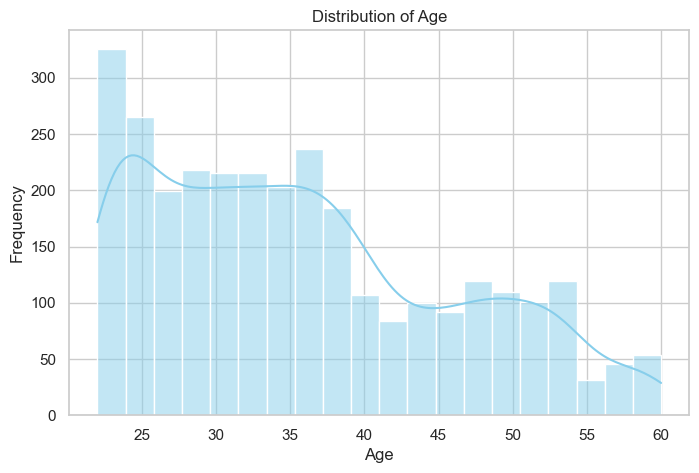

In [30]:
# Univariate Analysis: Analysis the univariate distribution of age 
# Most employees are between 25 and 45 years old, with the distribution slightly skewed toward younger ages.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


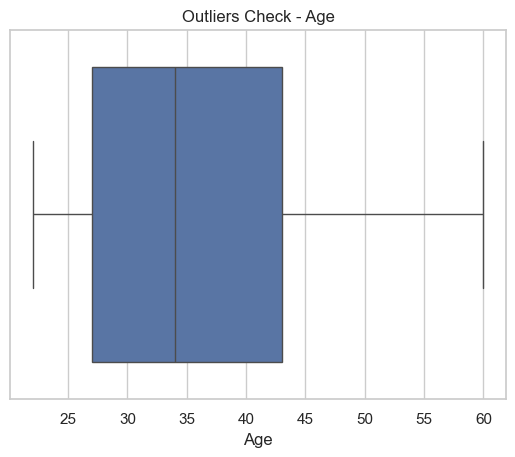

In [31]:
# The boxplot shows a few mild outliers above age 55, but most employees are clustered between 25 and 45 years.
sns.boxplot (x=df ["Age"])
plt.title("Outliers Check - Age")
plt.show()

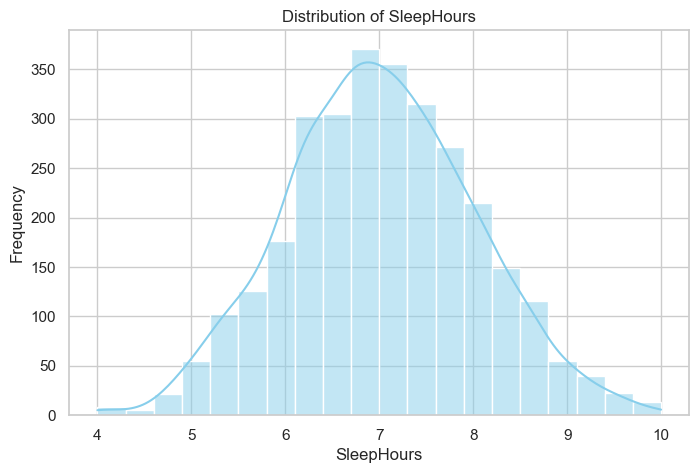

In [32]:
# Most employees sleep between 6 and 8 hours per night, indicating a generally healthy sleep pattern.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['SleepHours'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of SleepHours')
plt.xlabel('SleepHours')
plt.ylabel('Frequency')
plt.show()


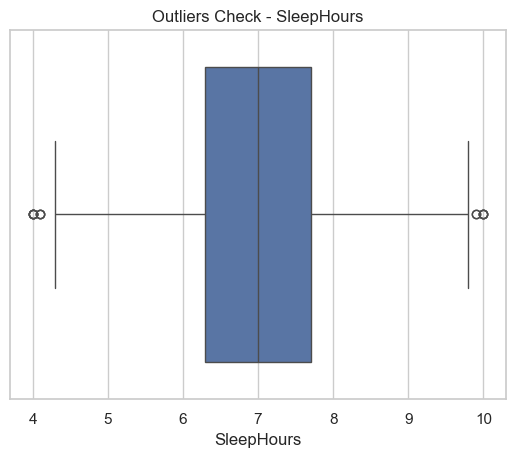

In [33]:
# The boxplot shows that SleepHours are mostly within a normal range, with few or no significant outliers.
sns.boxplot (x=df ["SleepHours"])
plt.title("Outliers Check - SleepHours")
plt.show()

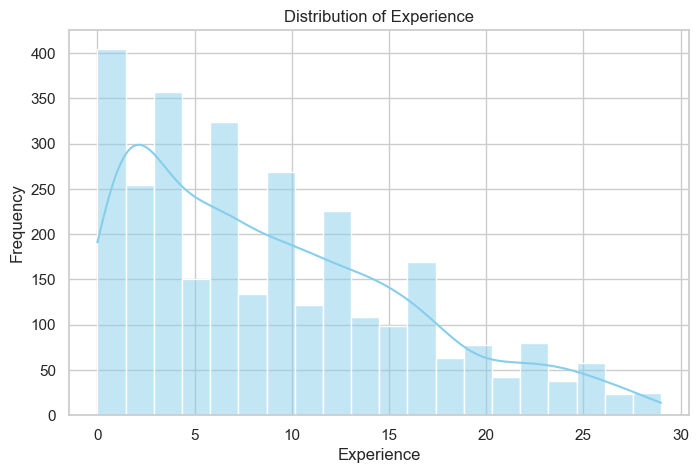

In [34]:
# The distribution of experience peaks around 5 to 10 years, with fewer employees having over 20 years of experience.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['Experience'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()


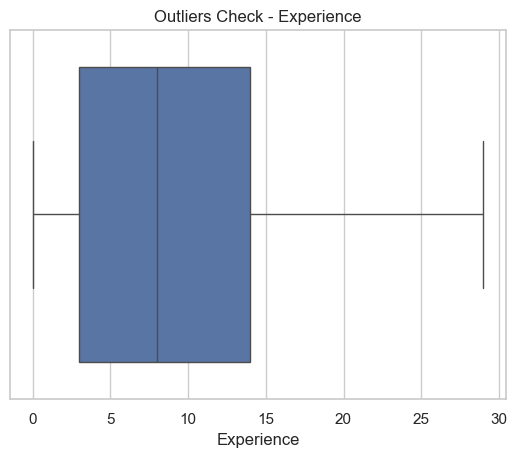

In [35]:
# this outliers show the 5 to 15 range experience
sns.boxplot (x=df ["Experience"])
plt.title("Outliers Check - Experience")
plt.show()

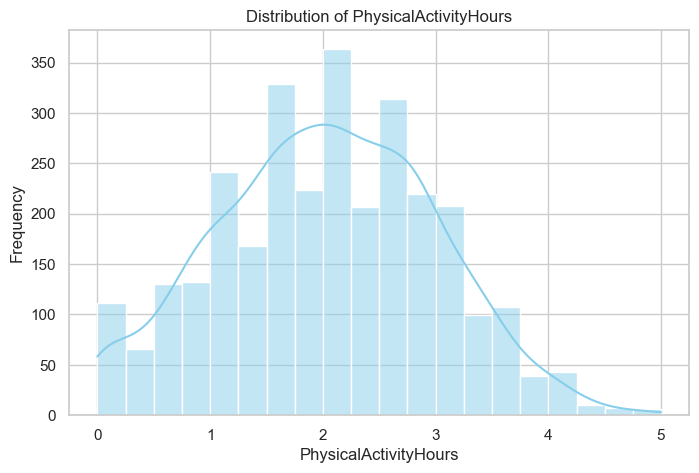

In [36]:
# skewed toward 1–3 hours/day, with few at 0 or 5.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['PhysicalActivityHours'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of PhysicalActivityHours')
plt.xlabel('PhysicalActivityHours')
plt.ylabel('Frequency')
plt.show()


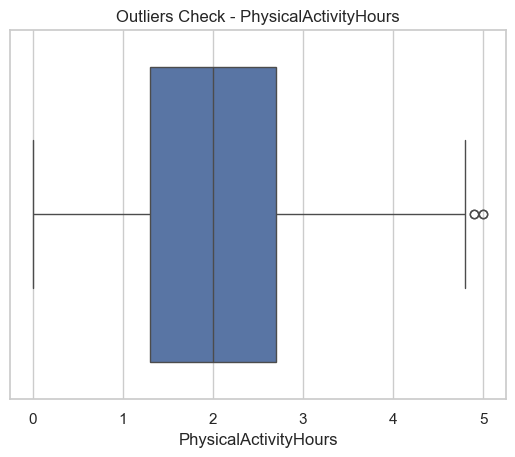

In [37]:
sns.boxplot (x=df ["PhysicalActivityHours"])
plt.title("Outliers Check - PhysicalActivityHours")
plt.show()

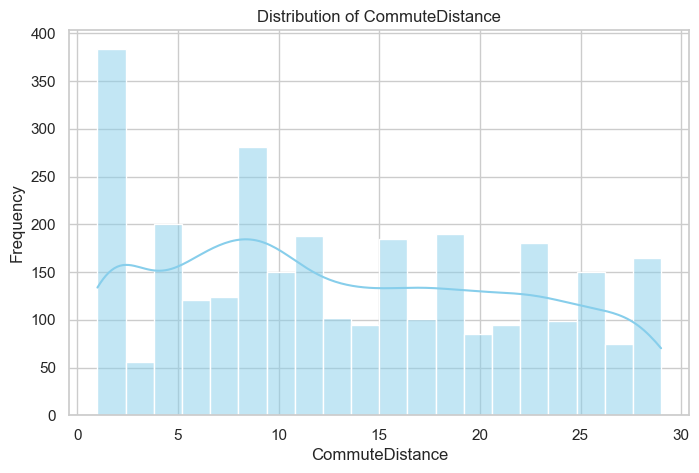

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['CommuteDistance'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of CommuteDistance')
plt.xlabel('CommuteDistance')
plt.ylabel('Frequency')
plt.show()


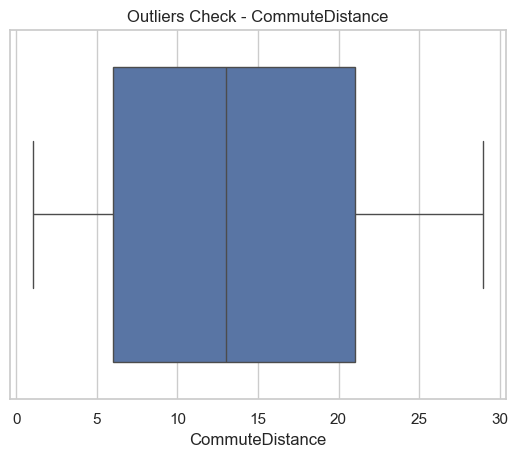

In [39]:
sns.boxplot (x=df ["CommuteDistance"])
plt.title("Outliers Check - CommuteDistance")
plt.show()

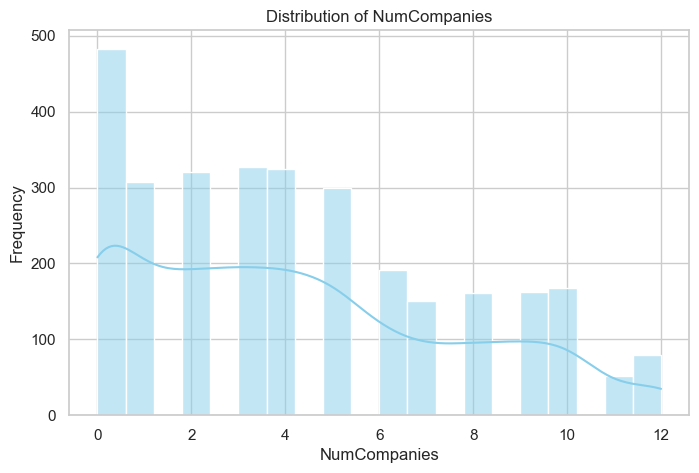

In [40]:
# A notable number of employees have worked at 3–5 companies, but some have 0 or more than 10.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['NumCompanies'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of NumCompanies')
plt.xlabel('NumCompanies')
plt.ylabel('Frequency')
plt.show()


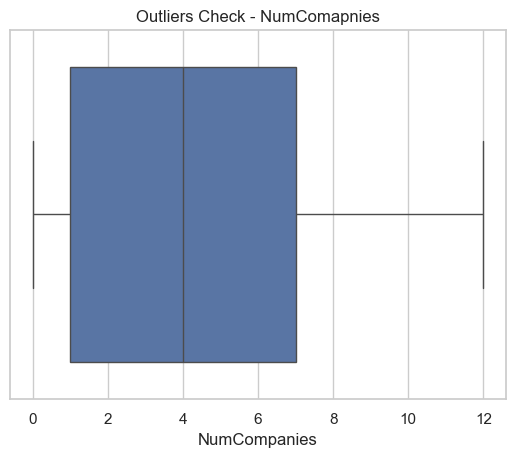

In [41]:
sns.boxplot (x=df ["NumCompanies"])
plt.title("Outliers Check - NumComapnies")
plt.show()

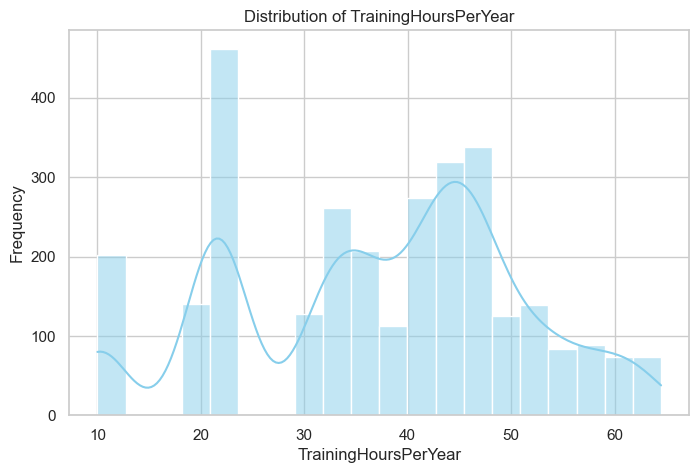

In [42]:
# Most employees receive around 40 hours of training per year, with the distribution slightly right-skewed.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['TrainingHoursPerYear'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of TrainingHoursPerYear')
plt.xlabel('TrainingHoursPerYear')
plt.ylabel('Frequency')
plt.show()

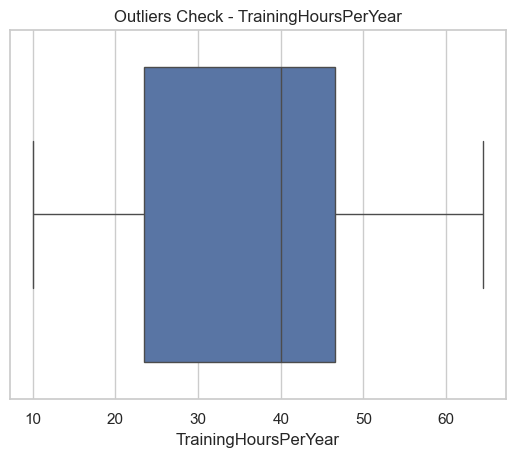

In [43]:
# The boxplot reveals a few high-end outliers, but most employees receive 20 to 50 hours of training annually.
sns.boxplot (x=df ["TrainingHoursPerYear"])
plt.title("Outliers Check - TrainingHoursPerYear")
plt.show()

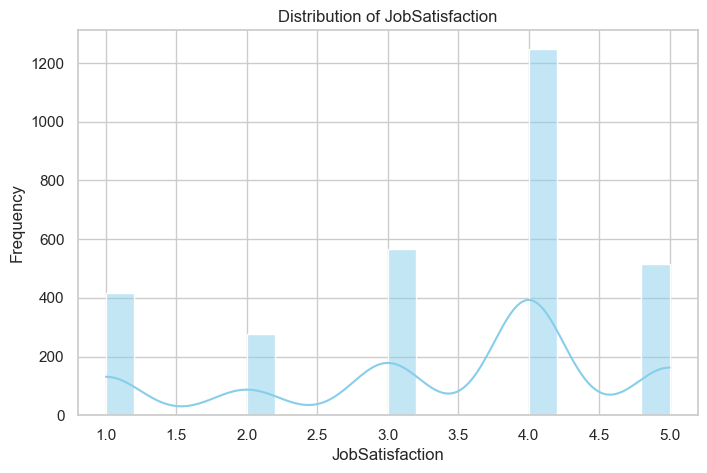

In [44]:
# JObsatisfaction is highest at level 4, with noticeable frequencies also at levels 1, 3, and 5, indicating a bimodal satisfaction distribution.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['JobSatisfaction'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Frequency')
plt.show()

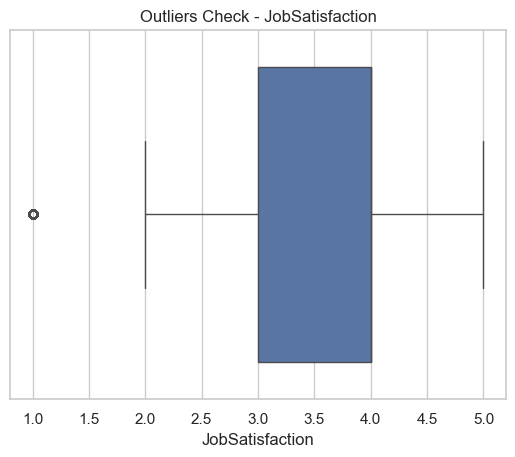

In [45]:
# The boxplot shows no significant outliers, with most JobSatisfaction scores tightly clustered between 3 and 5.
sns.boxplot (x=df ["JobSatisfaction"])
plt.title("Outliers Check - JobSatisfaction")
plt.show()

count    3025.000000
mean        7.005983
std         1.002652
min         4.000000
25%         6.300000
50%         7.000000
75%         7.700000
max        10.000000
Name: SleepHours, dtype: float64


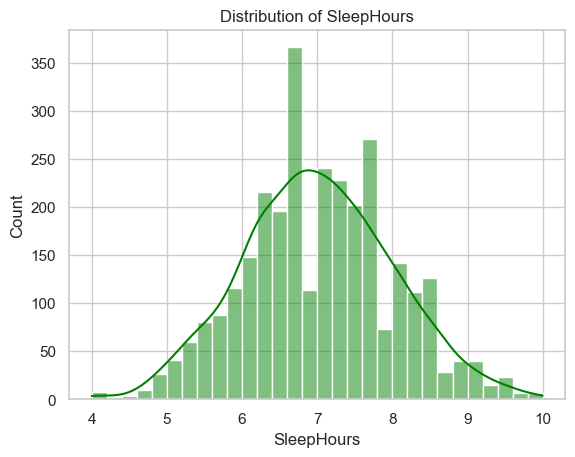

In [46]:
# In this plot we observe the distribution of SleepHours using histplot
# Sleep hours are mostly concentrated between 6 to 8 hours, indicating a fairly typical sleep pattern among employees.
print(df["SleepHours"].describe())
sns.histplot( data=df, x="SleepHours", bins=30, kde=True, color='green')
plt.title("Distribution of SleepHours")
plt.show()

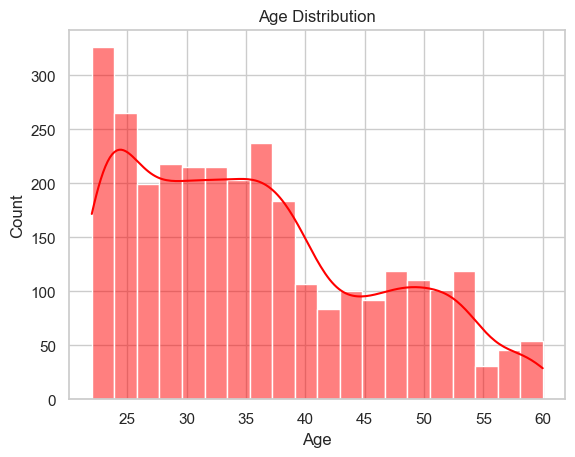

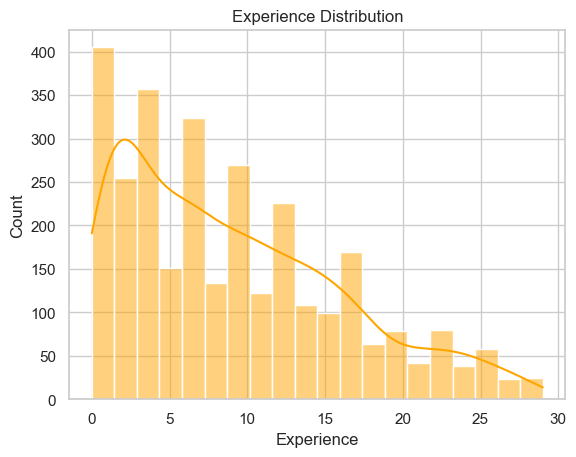

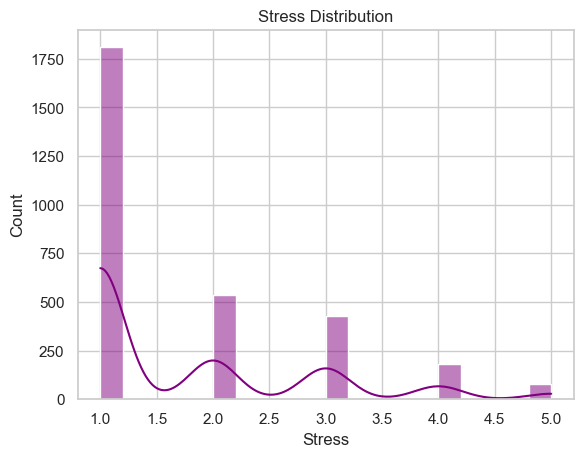

In [47]:
# Age vs Experience: Most employees are between 25–35 years old and have 3–10 years of experience, showing a young and mid-level workforce.
# Stress Distribution: Stress levels are skewed slightly toward the higher end, indicating many employees experience moderate to high stress at work.
numerical_cols = ['Age' , 'Experience', 'Stress']
colors = ['red', 'orange', 'purple']
for col, col_color in zip(numerical_cols, colors):
    sns.histplot(data = df, x=col, bins=20, kde=True, color=col_color)
    plt.title(f"{col} Distribution")
    plt.show()

### Data Visualization

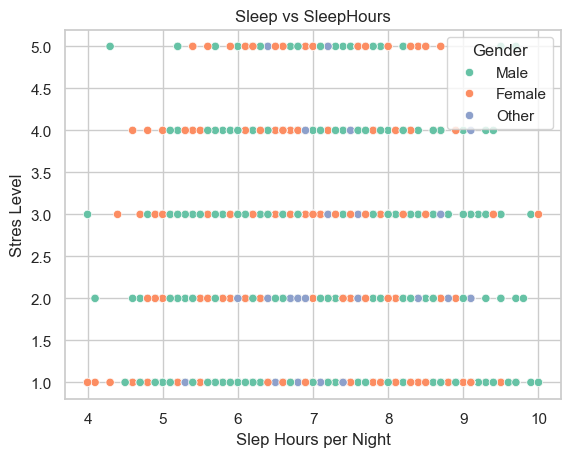

In [48]:
### Bivariate Plot : Scatter Plot
# We use the Scatter plot for show the relationship between two variables.
# here we show the relationship betwen Stress vs Sleephours
sns.scatterplot(data = df, x="SleepHours", y="Stress", hue= "Gender", palette="Set2")
plt.title("Sleep vs SleepHours")
plt.xlabel("Slep Hours per Night")
plt.ylabel("Stres Level")
plt.show()

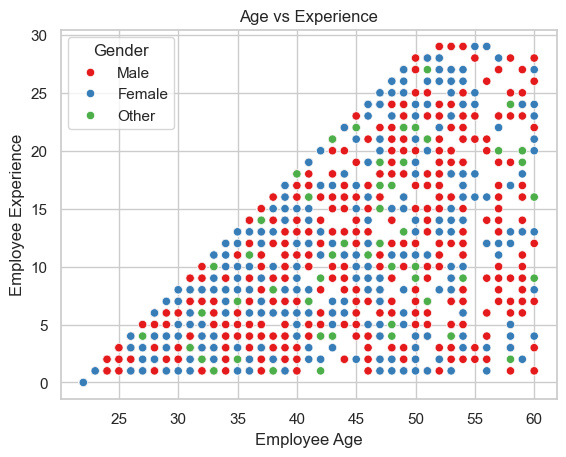

In [49]:
# here we show the relationship betwen Age  vs Experience.
# Gender wise distribution of scatterplot to predict the how many employess according to their gender take experience.
sns.scatterplot(data = df, x="Age", y="Experience", hue= "Gender", palette="Set1")
plt.title("Age vs Experience")
plt.xlabel("Employee Age")
plt.ylabel("Employee Experience")
plt.show()

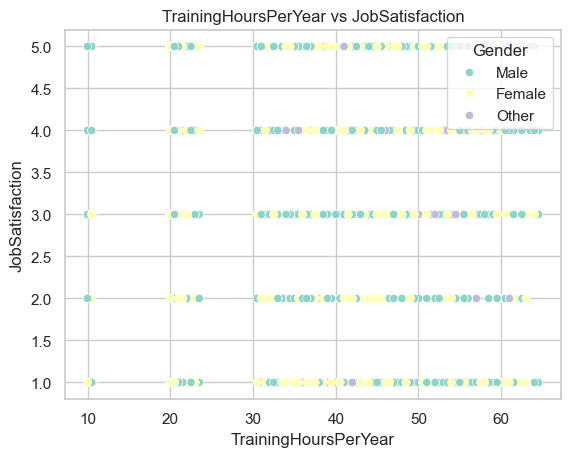

In [50]:
# The Scatter plot visualize the relationship between TrainingHoursPerYear and JobSatisfaction .
# In this plot show the how many male, female and other employees satisfied for this job and how much time taken trainings.
sns.scatterplot(data = df, x="TrainingHoursPerYear", y="JobSatisfaction", hue= "Gender", palette="Set3")
plt.title("TrainingHoursPerYear vs JobSatisfaction")
plt.xlabel("TrainingHoursPerYear")
plt.ylabel("JobSatisfaction")
plt.show()

In [51]:
# describe the categorical column for count plot
df[categorical_columns].describe()

,Gender,MaritalStatus,JobLevel,Dept,EmpType,CommuteMode,EduLevel,haveOT
count,3025,3025,3025,3025,3025,3025,3025,3025
unique,3,4,5,8,3,5,4,2
top,Male,Single,Senior,IT,Full-Time,Car,Bachelor,False
freq,1528,1437,1069,774,2077,1087,2300,2089


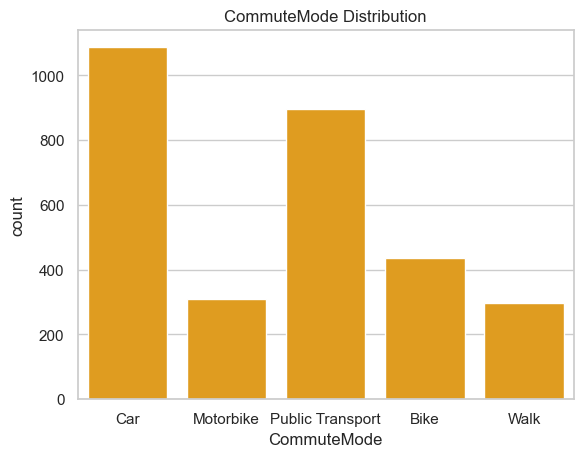

In [52]:
# count the CommuteMode dstribution of employe transport
sns.countplot(x="CommuteMode", data=df, color='orange')
plt.title("CommuteMode Distribution")
plt.show()

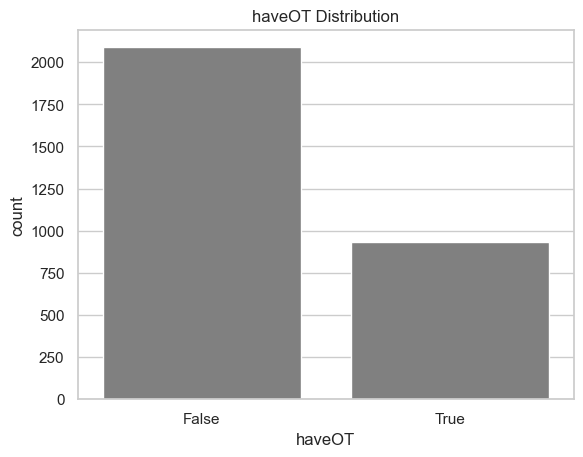

In [53]:
# to count the distribution of haveOT.
sns.countplot(x="haveOT", data=df, color='gray')
plt.title("haveOT Distribution")
plt.show()

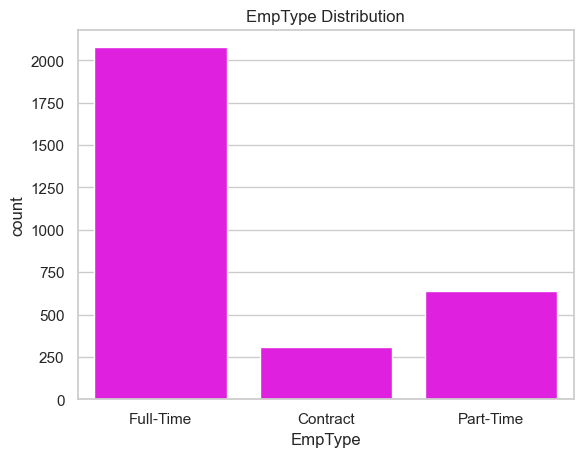

In [54]:
# in this plot we observe the how many emploees are work fulltime, Contract basis and Part Time.
sns.countplot(x="EmpType", data=df, color='magenta')
plt.title("EmpType Distribution")
plt.show()

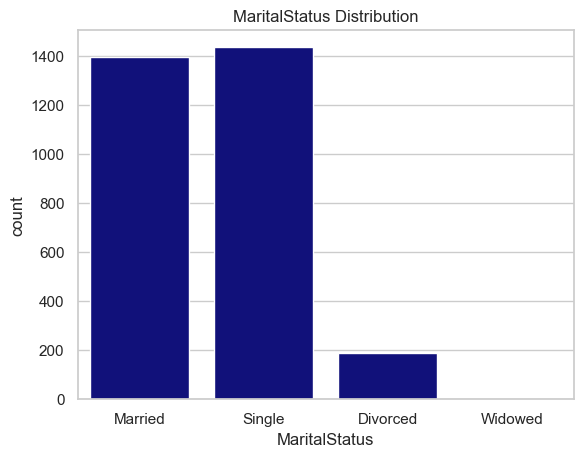

In [55]:
# in this plot we observe the how many employees woring in comapnies are Single, Married, Divorced and Wiowed.
# show the distribution of MaritalStatus.
sns.countplot(x="MaritalStatus", data=df, color='darkblue')
plt.title("MaritalStatus Distribution")
plt.show()

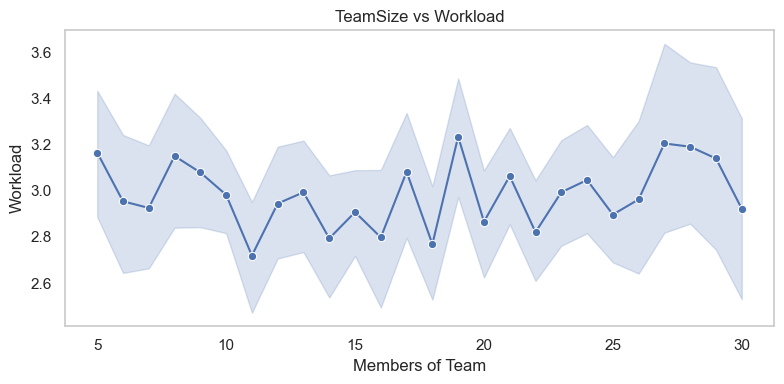

In [56]:
# Bivariate Plot: Line Plot
# As team size increases, the average workload tends to slightly decrease, suggesting that responsibilities may be more distributed in larger teams.

plt.figure(figsize=(8,4))
sns.lineplot (data=df, x="TeamSize", y="Workload", marker="o")
plt.title("TeamSize vs Workload")
plt.xlabel("Members of Team")
plt.ylabel("Workload")
plt.grid(False)
plt.tight_layout()
plt.show()

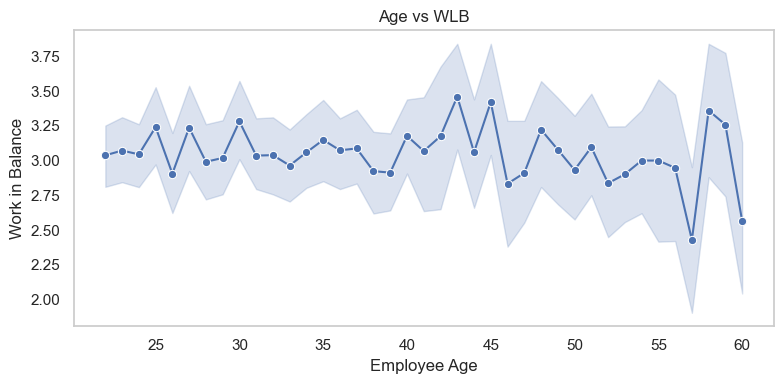

In [57]:
# As age increases, the average work-life balance (WLB) tends to improve slightly,
# indicating that older employees may manage or perceive work-life balance better.
plt.figure(figsize=(8,4))
sns.lineplot (data=df, x="Age", y="WLB", marker="o")
plt.title("Age vs WLB")
plt.xlabel("Employee Age")
plt.ylabel("Work in Balance")
plt.grid(False)
plt.tight_layout()
plt.show()

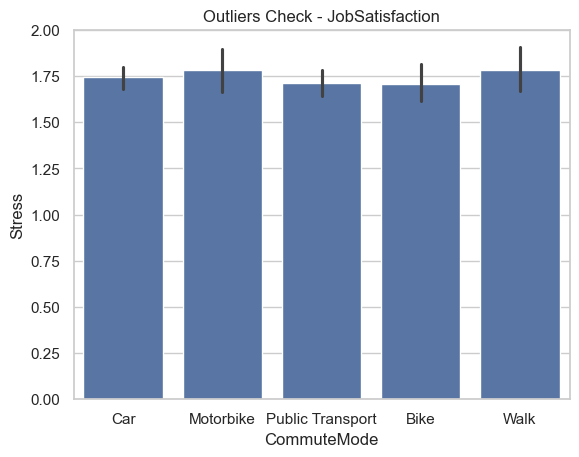

In [58]:
# Showing mean values per category.
# showing categorical vs numerical bar plot
sns.barplot (x='CommuteMode', y='Stress', data=df)
plt.title("Outliers Check - JobSatisfaction")
plt.show()

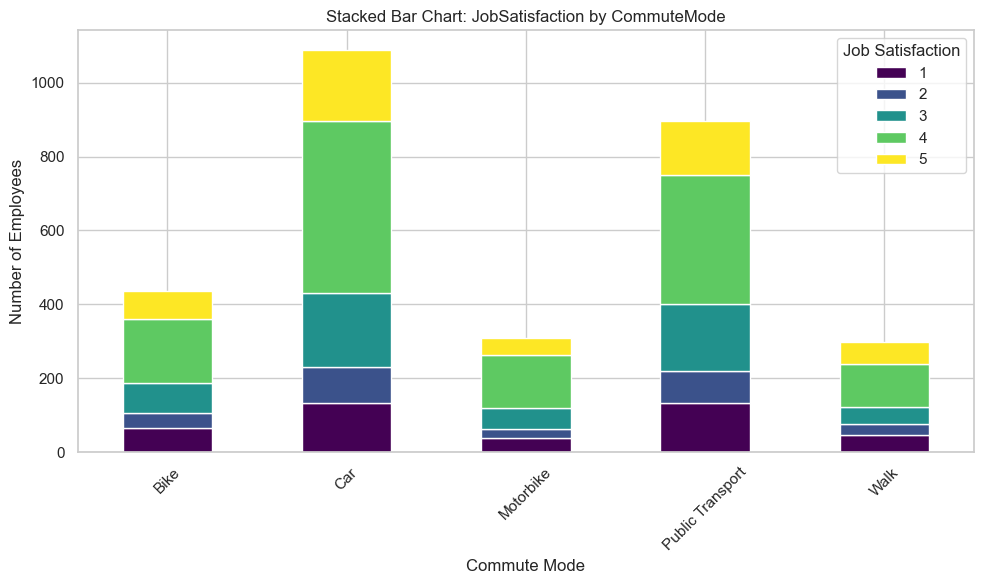

In [59]:
# Stacked bar chart: 
# In this chart Employees who commute by Car tend to report higher levels of job satisfaction compared to those using Walking .  

# Create a crosstab (frequency table)
crosstab = pd.crosstab(df["CommuteMode"], df["JobSatisfaction"])

# Plot as stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
plt.title("Stacked Bar Chart: JobSatisfaction by CommuteMode")
plt.xlabel("Commute Mode")
plt.ylabel("Number of Employees")
plt.legend(title="Job Satisfaction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

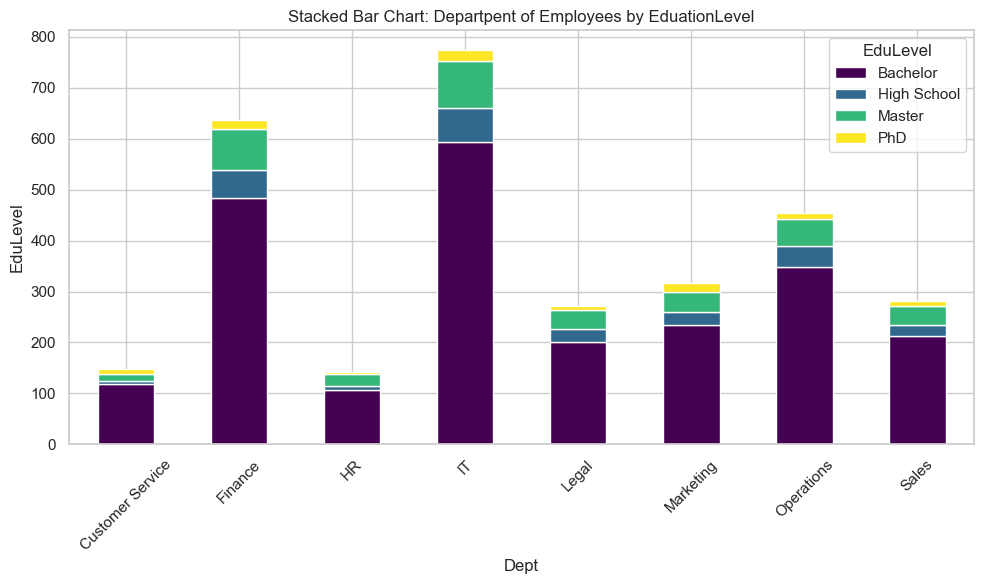

In [60]:
# The stacked bar chart shows that most departments have employees across all education levels, 
# with some departments (like IT or HR) having a higher proportion of advanced degrees.

# Create a crosstab (frequency table)
crosstab = pd.crosstab(df["Dept"], df["EduLevel"])

# Plot as stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
plt.title("Stacked Bar Chart: Departpent of Employees by EduationLevel")
plt.xlabel("Dept")
plt.ylabel("EduLevel")
plt.legend(title="EduLevel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

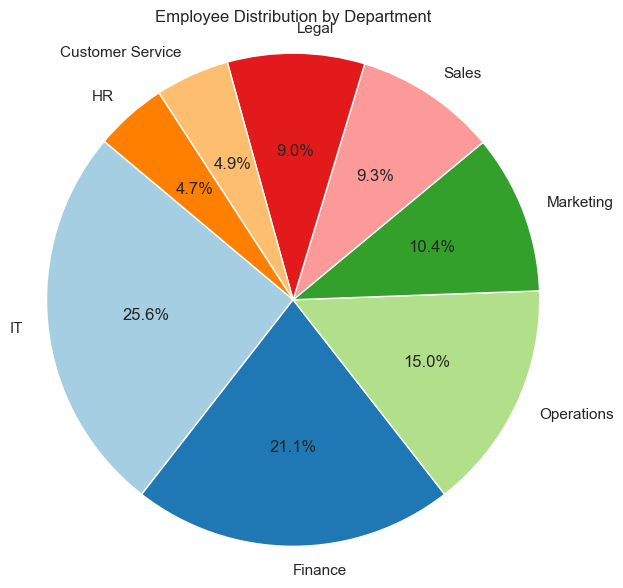

In [61]:
## Pie Chart:
# The majority of employees belong to the IT and Fianance, indicating a strong technical workforce in the observation.

# Count of each department
dept_counts = df ["Dept"].value_counts()

# Plot Pie Chart
plt.figure(figsize= (7,7))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Employee Distribution by Department")
plt.axis('equal') # Equal aspect ratio to make it a perfect circle
plt.show()

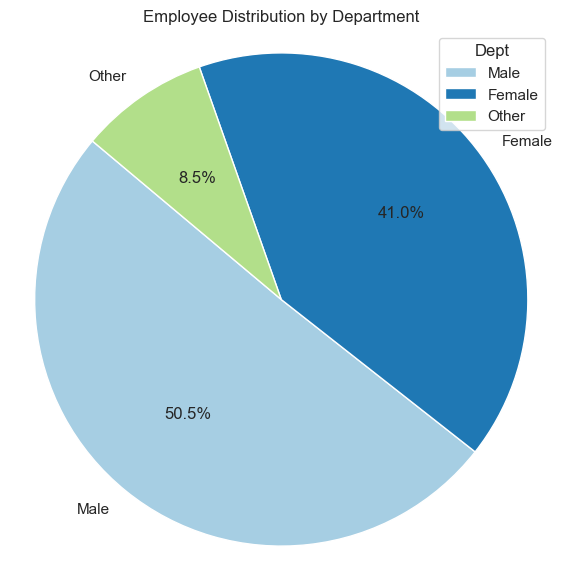

In [62]:
# This Pie chart shows a balanced gender distribution , with a slight majority of male distribution in the organization.
# Count of each department
gender_counts = df ["Gender"].value_counts()

# Plot Pie Chart
plt.figure(figsize= (7,7))
plt.pie(gender_counts, labels=gender_counts.index,  autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Employee Distribution by Department")
plt.legend(title="Dept")
plt.axis('equal') # Equal aspect ratio to make it a perfect circle
plt.show()

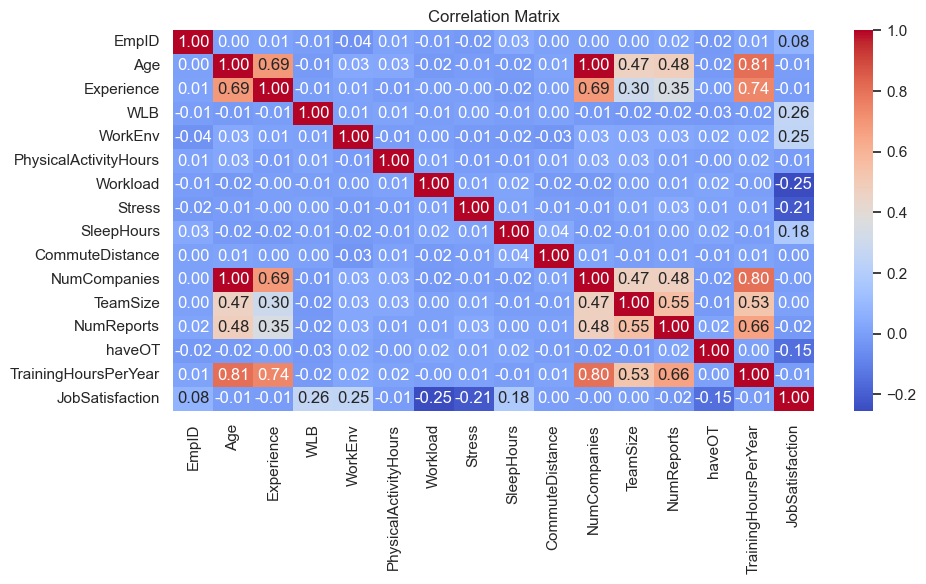

In [63]:
# The heatmap shows strong positive correlations between Age, Experience, and TrainingHoursPerYear,
# while most other variables—including JobSatisfaction—exhibit weak or negligible correlations.

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

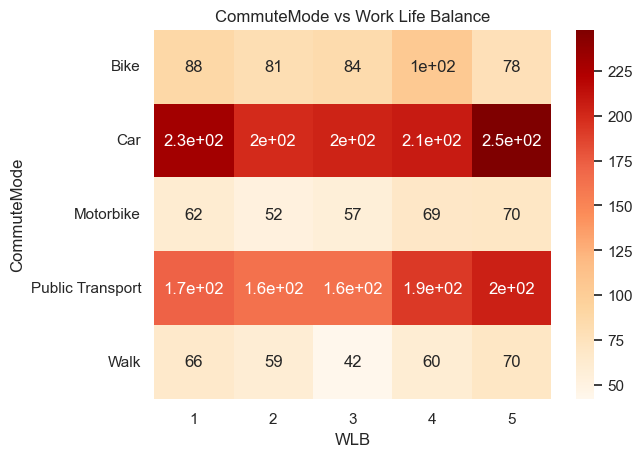

In [64]:
# Employees who commute by car or bike tend to report better work-life balance, while those using bus or walking often show lower WLB scores.
sns.heatmap(pd.crosstab(df['CommuteMode'], df['WLB']), annot=True, cmap='OrRd')
plt.title("CommuteMode vs Work Life Balance")
plt.show()


In [65]:
#grouping column
# Which department are most stressed?

dept_stress = df.groupby('Dept')['Stress'].mean().sort_values(ascending=False)
print(dept_stress)

Dept
Finance             1.813187
Legal               1.779412
HR                  1.762238
Marketing           1.753165
Sales               1.725979
Operations          1.696703
Customer Service    1.693878
IT                  1.682171
Name: Stress, dtype: float64


In [66]:
# Is jobsatisfaction linked to commute mode or workload?

commute_satisfaction = df.groupby('CommuteMode')['JobSatisfaction'].mean().sort_values(ascending=False)
print(commute_satisfaction)

CommuteMode
Car                 3.446182
Motorbike           3.435484
Walk                3.377104
Bike                3.350917
Public Transport    3.318436
Name: JobSatisfaction, dtype: float64


In [67]:
# How does education level affect employee sentiment?
edu_satisfaction = df.groupby('EduLevel')['JobSatisfaction'].mean().sort_values(ascending=False)
print(edu_satisfaction)

EduLevel
Master         3.728947
High School    3.432653
Bachelor       3.345652
PhD            2.920000
Name: JobSatisfaction, dtype: float64


In [68]:
# Suggest wellness programs for high-stres teams.
high_stress_depts = dept_stress[dept_stress > 7]
print("High Stress Departments:\n", high_stress_depts)

High Stress Departments:
 Series([], Name: Stress, dtype: float64)


In [69]:
#we combine it with an aggregation function using median()
df.groupby("Dept")["JobSatisfaction"].median()


Dept
Customer Service    4.0
Finance             4.0
HR                  4.0
IT                  4.0
Legal               4.0
Marketing           4.0
Operations          4.0
Sales               4.0
Name: JobSatisfaction, dtype: float64

In [70]:
# Median Stress Level by Workload Category
# when workload increase then whats the median level of stress
df.groupby("Workload")["Stress"].median()


Workload
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: Stress, dtype: float64

In [71]:
# Median Experience by Department
# Which department has employees with above-average experience.
df.groupby("Dept")["Experience"].median()


Dept
Customer Service    8.0
Finance             7.0
HR                  9.0
IT                  7.0
Legal               7.0
Marketing           8.0
Operations          8.0
Sales               7.0
Name: Experience, dtype: float64

In [72]:
# This line saves the DataFrame df to a CSV file named cleaned_dataset.csv without writing the row index as a separate column in the file.
df.to_csv("cleaned_dataset.csv", index=False)

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1
